In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'E:\step to ML\DataSets\titanic\train2.csv')
titanic_test=pd.read_csv(r'E:\step to ML\DataSets\titanic\test2.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
null_percentage_cabin=df['Cabin'].isnull().sum()/len(df)*100
null_percentage_cabin

77.10437710437711

In [6]:
df=df.drop(labels="Cabin",axis=1)

In [7]:
# df=df.dropna()
891-712

179

In [8]:
df['Age'].median()

28.0

In [9]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [12]:
len(numerical_features)

7

In [13]:
catagarical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
catagarical_features

['Name', 'Sex', 'Ticket', 'Embarked']

In [14]:
catg_2_features=[]
for feature in catagarical_features:
    if len(df[feature].unique())==2:
        catg_2_features.append(feature)
catg_2_features

['Sex']

In [15]:
df['Sex']=(df['Sex']=='male').astype(int)

In [16]:
df['Sex'].dtype

dtype('int32')

In [17]:
#df['Embarked']=(df['Embarked']=='C').astype(int)

In [18]:
numerical_features2 = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_features2

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [19]:
len(numerical_features2)

8

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


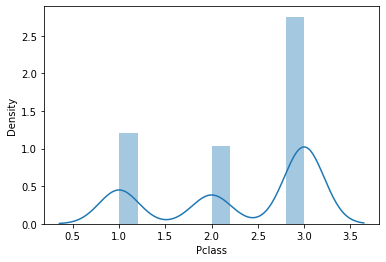

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


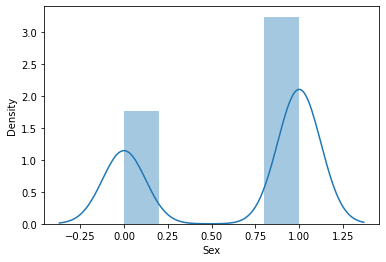

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


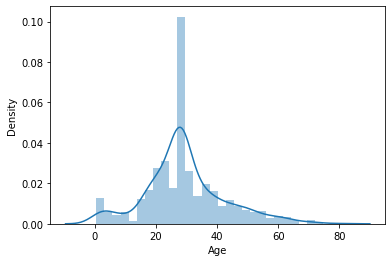

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


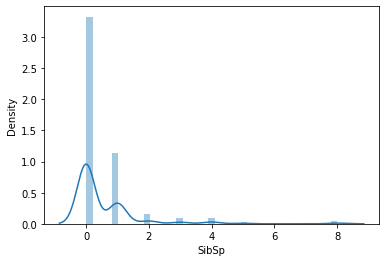

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


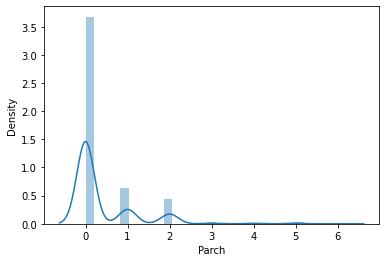

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


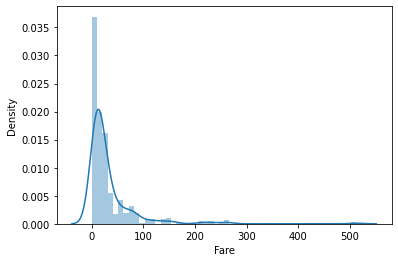

In [20]:
for feature in numerical_features2[2:]:
    sns.distplot(df[feature])
    plt.show()    

**********************************

In [21]:
c_matrix=df.corr()

In [22]:
c_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

In [23]:
strong_relation_features=[]
for feature in c_matrix['Survived'].sort_values(ascending=False).keys():
    if c_matrix['Survived'][feature]>=0.04 or c_matrix['Survived'][feature]<=-0.04:
        strong_relation_features.append(feature)
strong_relation_features

['Survived', 'Fare', 'Parch', 'Age', 'Pclass', 'Sex']

In [24]:
strong_relation_features.remove('Survived')

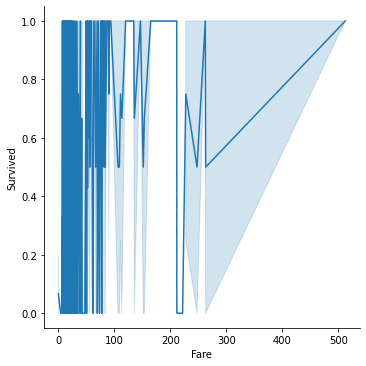

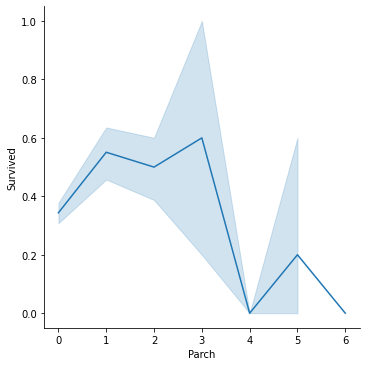

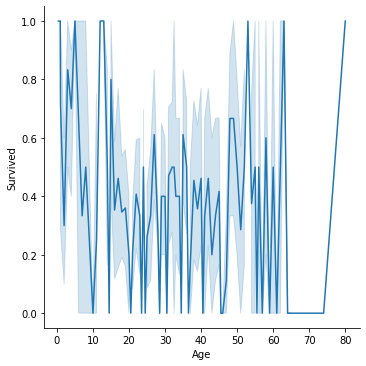

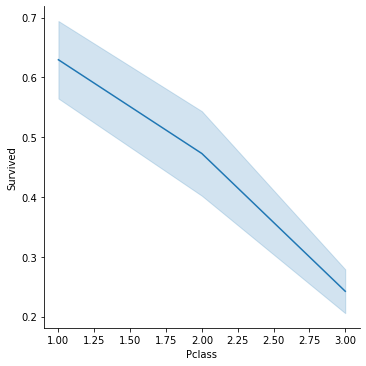

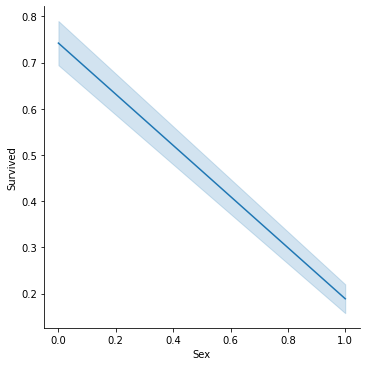

In [25]:
for feature in strong_relation_features:
    sns.relplot(x=feature,y="Survived",data=df,kind='line')

In [26]:
numerical_features2.remove('PassengerId')
numerical_features2

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [27]:
strong_relation_features

['Fare', 'Parch', 'Age', 'Pclass', 'Sex']

In [28]:
X=df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
# X=df[strong_relation_features]
X.shape

(891, 6)

In [29]:
y=df['Survived']
y.shape

(891,)

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(X, y)

ExtraTreesClassifier()

In [31]:
selection.feature_importances_

array([0.10577332, 0.29512525, 0.23880275, 0.04540268, 0.03802018,
       0.27687581])

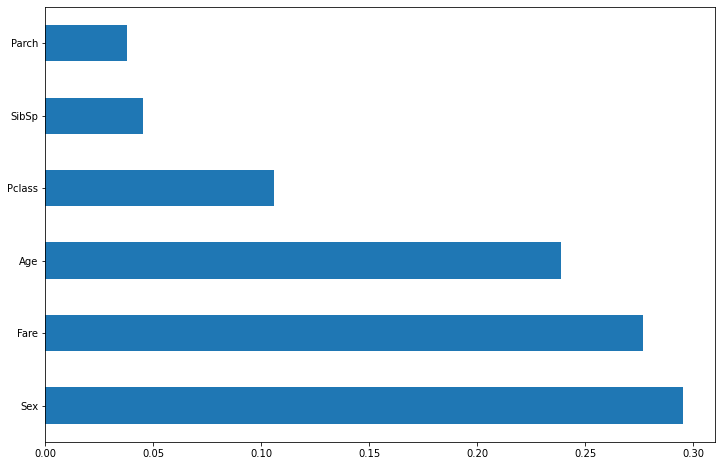

In [32]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [33]:
X=df[['Age','Sex','Fare','Pclass']]
X.shape

(891, 4)

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
model_scoring={}
def all_model_scores(model,X,y):
    scores=cross_val_score(model,X,y,cv=10)
    mean_score=scores.mean()
    model_scoring.update({model:mean_score})
    return model_scoring
Model_list=[DecisionTreeClassifier(),LogisticRegression(solver='lbfgs', max_iter=1000),RandomForestClassifier(),SVC()]
for model in Model_list:
    score_dict=all_model_scores(model,X,y)
df_Models_scores=pd.DataFrame(score_dict,index=[0])
df_Models_scores

,DecisionTreeClassifier(),LogisticRegression(max_iter=1000),RandomForestClassifier(),SVC()
0,0.788989,0.787878,0.816005,0.671261


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 4), (179, 4), (712,), (179,))

In [38]:
# fare and Embarked feature decrease score from 81 to 72

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [40]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()

In [41]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [42]:
y_predicted = model.predict(X_test)

In [43]:
y_predicted

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [44]:
model.predict_proba(X_test)

array([[0.89792764, 0.10207236],
       [0.77888527, 0.22111473],
       [0.87886886, 0.12113114],
       [0.13445799, 0.86554201],
       [0.34553056, 0.65446944],
       [0.08245914, 0.91754086],
       [0.42988157, 0.57011843],
       [0.86636522, 0.13363478],
       [0.35794633, 0.64205367],
       [0.074236  , 0.925764  ],
       [0.58987654, 0.41012346],
       [0.92992404, 0.07007596],
       [0.42475445, 0.57524555],
       [0.90328053, 0.09671947],
       [0.79931843, 0.20068157],
       [0.06821928, 0.93178072],
       [0.62008638, 0.37991362],
       [0.42985862, 0.57014138],
       [0.76052758, 0.23947242],
       [0.64939584, 0.35060416],
       [0.88918547, 0.11081453],
       [0.57916922, 0.42083078],
       [0.37544593, 0.62455407],
       [0.8787051 , 0.1212949 ],
       [0.89800845, 0.10199155],
       [0.84638322, 0.15361678],
       [0.61513676, 0.38486324],
       [0.77837568, 0.22162432],
       [0.82571157, 0.17428843],
       [0.44844168, 0.55155832],
       [0.

In [45]:
model.score(X_test,y_test)

0.8044692737430168

In [46]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[90, 15],
       [20, 54]], dtype=int64)

Text(69.0, 0.5, 'Truth')

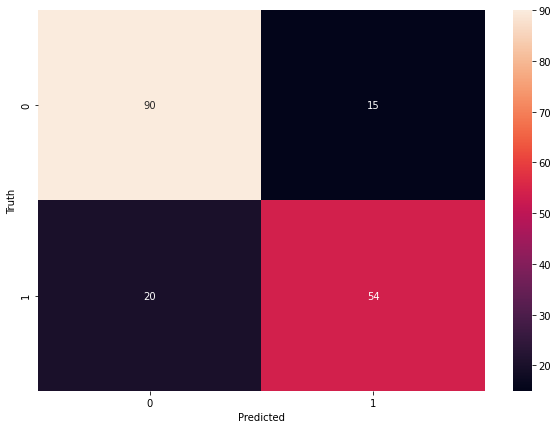

In [47]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))
print("Precision:",metrics.precision_score(y_test, y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))

Accuracy: 0.8044692737430168
Precision: 0.782608695652174
Recall: 0.7297297297297297


**f1_score**

In [49]:
def calculate_F1_score(x,y):
    from sklearn import metrics as mt
    return 2*mt.precision_score(x,y)*mt.recall_score(x,y)/(mt.precision_score(x,y)+mt.recall_score(x,y))

In [50]:
calculate_F1_score(y_test,y_predicted)

0.7552447552447553

In [51]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [52]:
titanic_test2=titanic_test[['Age','Sex','Fare','Pclass']]
titanic_test2

,Age,Sex,Fare,Pclass
0,5.0,male,7.8292,3
1,25.0,female,7.0000,3
2,23.0,male,9.6875,2
3,67.0,male,8.6625,3
4,22.0,female,12.2875,3
...,...,...,...,...
413,NaN,male,8.0500,3
414,39.0,female,108.9000,1
415,38.5,male,7.2500,3
416,NaN,male,8.0500,3


In [53]:
titanic_test2.isnull().sum()

Age       85
Sex        0
Fare       1
Pclass     0
dtype: int64

In [54]:
titanic_test2['Age']=titanic_test2['Age'].fillna(titanic_test2['Age'].median())
titanic_test2['Age']

<ipython-input-54-f81cc89c9fc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_test2['Age']=titanic_test2['Age'].fillna(titanic_test2['Age'].median())


0       5.0
1      25.0
2      23.0
3      67.0
4      22.0
       ... 
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64

In [55]:
titanic_test2['Fare']=titanic_test2['Fare'].fillna(0)
titanic_test2['Fare']

<ipython-input-55-1f1d269f3941>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_test2['Fare']=titanic_test2['Fare'].fillna(0)


0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [56]:
titanic_test2.isnull().sum()

Age       0
Sex       0
Fare      0
Pclass    0
dtype: int64

In [57]:
titanic_test2['Sex']=(titanic_test2['Sex']=='male').astype(int)

<ipython-input-57-9c344483a3c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_test2['Sex']=(titanic_test2['Sex']=='male').astype(int)


In [59]:
pred=model.predict(titanic_test2)
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
len(pred)

418

In [64]:
titanic_test['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [75]:
submission_data=pd.DataFrame(list(zip(titanic_test['PassengerId'],pred)),columns =['PassengerId','Survived']) 

In [76]:
submission_data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [77]:
submission_data.to_csv("submission.csv", index=False)